In [19]:
import torch
import pandas as pd
import numpy as np
from pathlib import Path
from sklearn.model_selection import train_test_split
import seaborn as sns
import matplotlib.pyplot as plt

torch.manual_seed(0)
np.random.seed(0)

In [2]:
home = str(Path.home())

In [3]:
home

'C:\\Users\\stazt'

In [4]:
# Load cleaned 2016-2018 OVS datasets; replace NAs by -1
OVS1618 = pd.read_csv(home + '/Documents/nBox/Project Ultron/Milestone 3/Dataset/Cleaned (Outliers Removed)/Reduced to Benchmarks-1.csv')

In [5]:
OVS1618.head()

,Expenditure on Accommodation (c4.tot.new),Expenditure on Accommodation (c4.tot.new)_cat,Expenditure on F&B (c6.tot.new),Expenditure on F&B (c6.tot.new)_cat,"Expenditure on Hawker Centre, Food Court or Coffee Shop (c6c_1.r)","Expenditure on Hawker Centre, Food Court or Coffee Shop (c6c_1.r)_cat",Expenditure on Casual Dining (c6c_2.r),Expenditure on Casual Dining (c6c_2.r)_cat,Expenditure on Transport (c7.tot.new),Expenditure on Transport (c7.tot.new)_cat,...,Mode of Transport (m1),Main POV - Leisure/Holiday (b13a_112),Main POV - Visiting Friends/Family (b13a_114),Main POV - Business (b13a_116),Main POV - Healthcare (b113_117),Main POV - Education/Training/Workshop (b13a_118),Main POV - Others (b13a_119),Travel Package (c1a),"Accommodation - Hotels (c4a_1, c4a_2, c4a_3)","Accommodation - Others (c4a_4, c4a_5, c4a_7, c4a_8)"
0,679.04,0,400.0,0,-1.0,1,400.0,0,50.0,0,...,1,1,0,0,0,0,0,1,1,0
1,-1.00,1,130.0,0,100.0,0,30.0,0,100.0,0,...,1,1,1,0,0,0,0,2,0,0
2,-1.00,1,120.0,0,120.0,0,-1.0,1,40.0,0,...,1,0,0,0,0,0,0,2,0,0
3,-1.00,1,80.0,0,-1.0,1,80.0,0,100.0,0,...,1,1,1,0,0,0,0,2,0,0
4,130.00,0,60.0,0,60.0,0,-1.0,1,40.0,0,...,1,1,0,0,0,0,0,2,0,1


In [6]:
OVS1618.shape

(66030, 38)

In [7]:
# List of 14 expenditure variables
list_expnd = ['Expenditure on Accommodation (c4.tot.new)',
              'Expenditure on F&B (c6.tot.new)',
              'Expenditure on Hawker Centre, Food Court or Coffee Shop (c6c_1.r)',
              'Expenditure on Casual Dining (c6c_2.r)',
              'Expenditure on Transport (c7.tot.new)', 
              'Expenditure on Sightseeing & Entertainment (c10.tot.new)',
              'Expenditure on Sightseeing (c10c_1.r)',
              'Expenditure on Attractions (c10c_2.r)',
              'Expenditure on Shopping (t7.m.any)',          
              'Expenditure on Healthcare & Wellness Products (t7.m.well)',
              'Expenditure on Confectionery & Food Items (t7.m.food)',
              'Expenditure on Fashion (t7.m.fash)',
              'Expenditure on Other Shopping Items (t7.m.gift + t7.m.oth)',
              'Package Expenditure Per Person (c1b.r)']

# List of 10 categorical variables
list_cat = ['Mode of Transport (m1)',
            'Main POV - Leisure/Holiday (b13a_112)',
            'Main POV - Visiting Friends/Family (b13a_114)',
            'Main POV - Business (b13a_116)',
            'Main POV - Healthcare (b113_117)',
            'Main POV - Education/Training/Workshop (b13a_118)',
            'Main POV - Others (b13a_119)',
            'Travel Package (c1a)',
            'Accommodation - Hotels (c4a_1, c4a_2, c4a_3)',
            'Accommodation - Others (c4a_4, c4a_5, c4a_7, c4a_8)']

In [8]:
with open(home + '/Documents/nBox/Project Ultron/Milestone 3/Dataset/Cleaned (Outliers Removed)/binary_categorical_columns.txt',"r+")   as f:
    new_cat_list = f.read().splitlines() 

In [9]:
new_cat_list

['Expenditure on Accommodation (c4.tot.new)_cat',
 'Expenditure on F&B (c6.tot.new)_cat',
 'Expenditure on Hawker Centre, Food Court or Coffee Shop (c6c_1.r)_cat',
 'Expenditure on Casual Dining (c6c_2.r)_cat',
 'Expenditure on Transport (c7.tot.new)_cat',
 'Expenditure on Sightseeing & Entertainment (c10.tot.new)_cat',
 'Expenditure on Sightseeing (c10c_1.r)_cat',
 'Expenditure on Attractions (c10c_2.r)_cat',
 'Expenditure on Shopping (t7.m.any)_cat',
 'Expenditure on Healthcare & Wellness Products (t7.m.well)_cat',
 'Expenditure on Confectionery & Food Items (t7.m.food)_cat',
 'Expenditure on Fashion (t7.m.fash)_cat',
 'Expenditure on Other Shopping Items (t7.m.gift + t7.m.oth)_cat',
 'Package Expenditure Per Person (c1b.r)_cat']

In [10]:
cat_cols = new_cat_list + list_cat

In [11]:
## split data into training/validation/test
OVS1618_train_val, OVS1618_test = train_test_split(OVS1618, test_size=0.15, random_state=42)

In [12]:
OVS1618_train_val.shape

(56125, 38)

In [13]:
OVS1618_test.shape

(9905, 38)

In [14]:
ctgan_samples =pd.read_csv(home + '/Documents/nBox/Project Ultron/Milestone 4/code/CTGAN/ctgan_samples.csv')

In [15]:
def data_cleaning(df):
    df_new = df.copy()
    for expnd in list_expnd:
        df_new[expnd] = df_new[expnd].mask(df_new[expnd+'_cat'] == 1)
        df_new[expnd] = df_new[expnd].mask(df_new[expnd] <= 0)
    return df_new

In [16]:
ctgan_samples_cleaned = data_cleaning(ctgan_samples)

## Plots of continuous benchmarks

In [17]:
def plots(original_data, synthetic_data, list_expnd):
    for col in list_expnd:
        prop = round(sum(original_data[col+'_cat'])/len(original_data[col+'_cat'])*100,2)
        plt.suptitle(col + " " + str(prop) +'% NAs')
              
        sns.kdeplot(original_data[col],shade=True, label='Original')
        if len(synthetic_data[col].unique()) > 1:
            sns.kdeplot(synthetic_data[col],shade=True, label='Synthetic')
        plt.legend();
        plt.show()

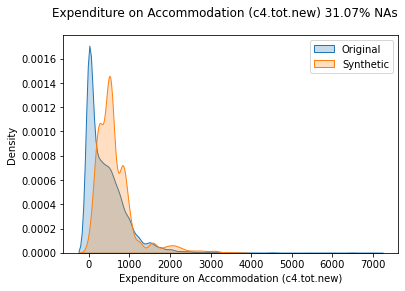

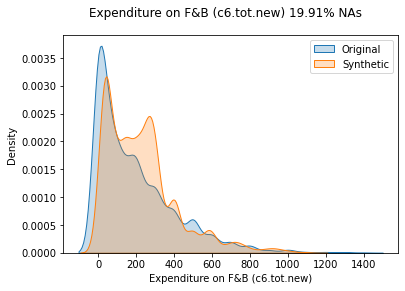

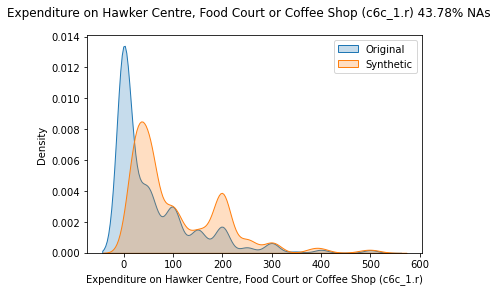

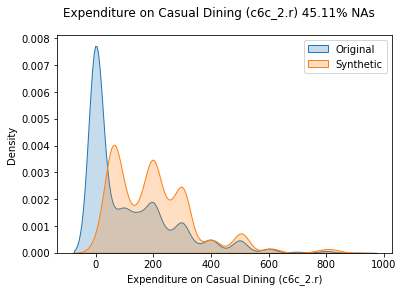

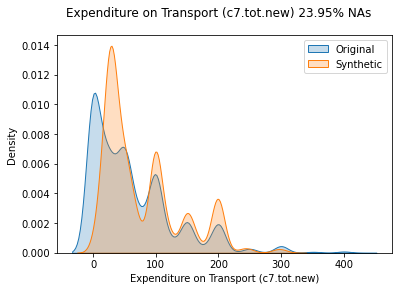

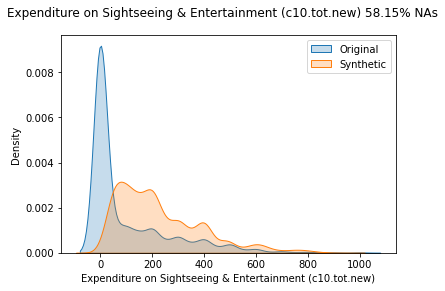

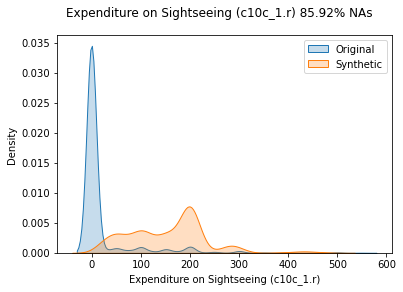

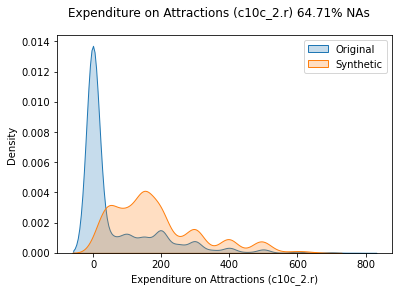

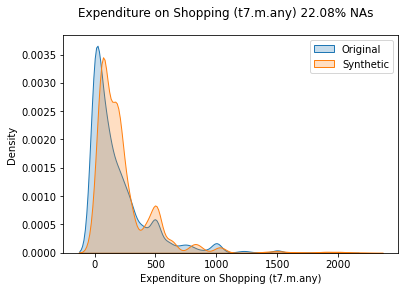

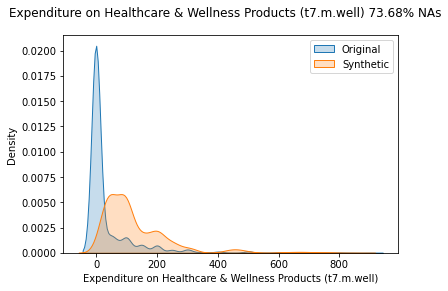

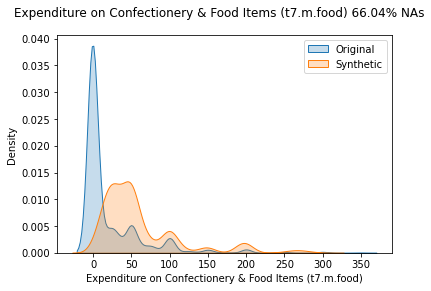

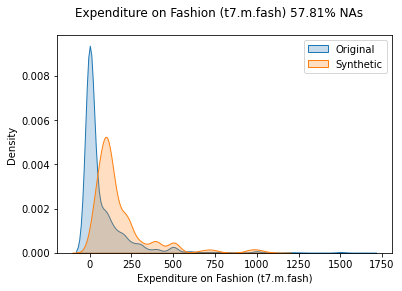

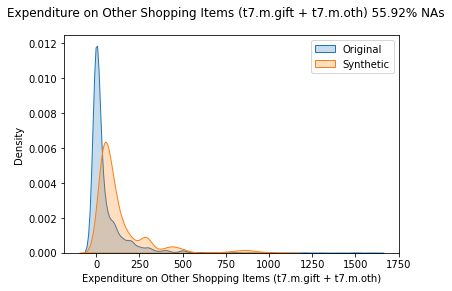

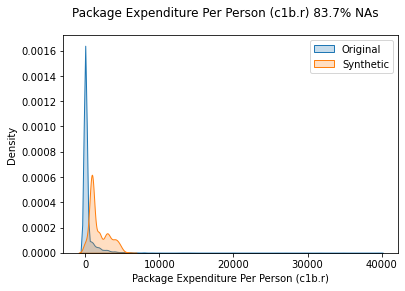

In [20]:
plots(OVS1618_test,ctgan_samples_cleaned,list_expnd)

## Plots of categorical benchmarks

In [21]:
def plot_bar(ovs, vgm1, cat_cols):
     for col in cat_cols:   
        width = 0.1
        xlab = np.asarray(ovs[col].value_counts().index)
        plt.bar(xlab,ovs[col].value_counts(), color='g', label='Original Data',width=width)
        plt.bar(xlab+width,vgm1[col].value_counts(), color='b', label='Synthetic Data',width=width)        
        plt.title(col)
        plt.legend();

        plt.show()

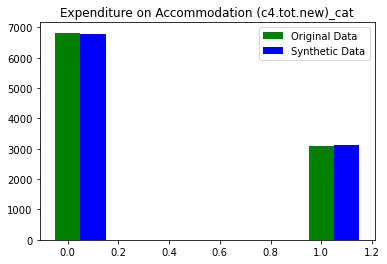

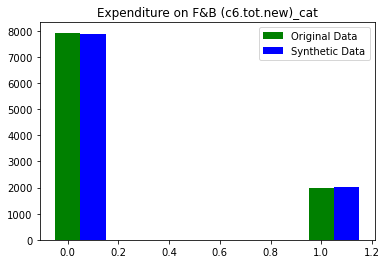

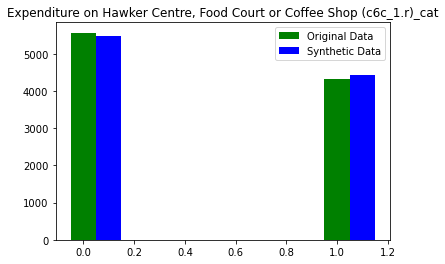

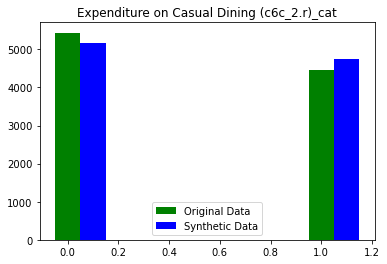

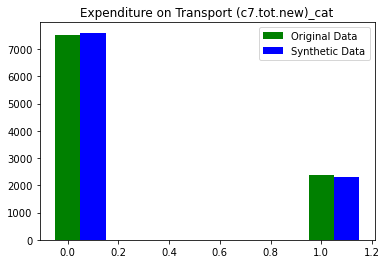

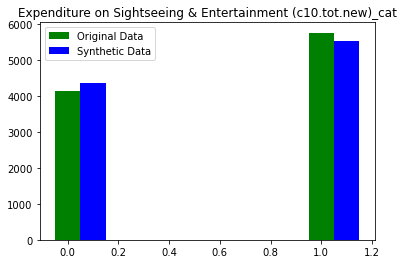

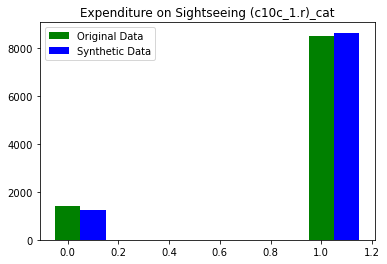

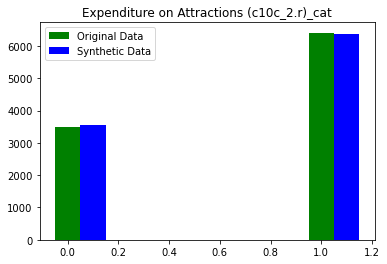

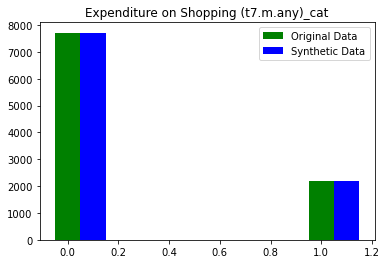

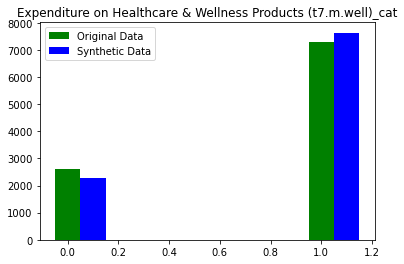

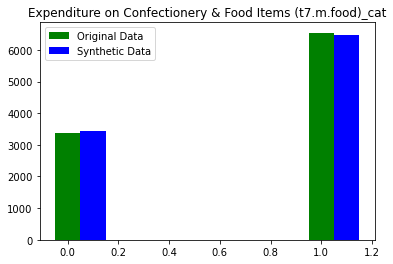

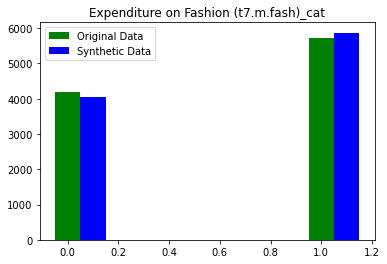

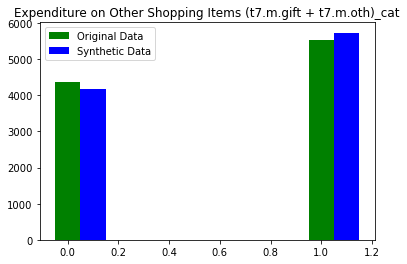

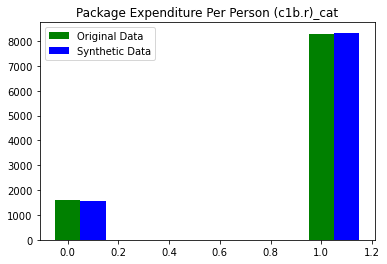

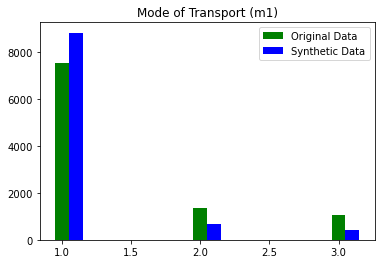

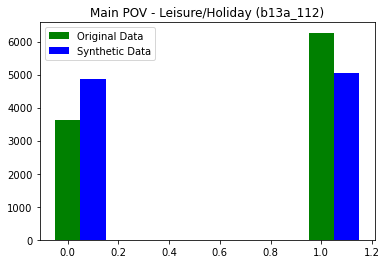

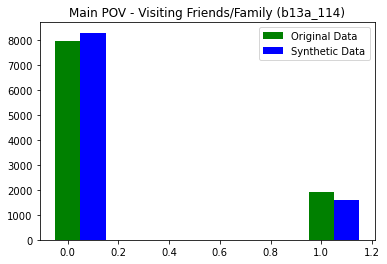

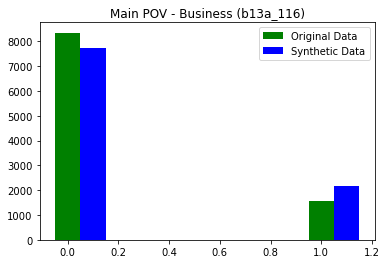

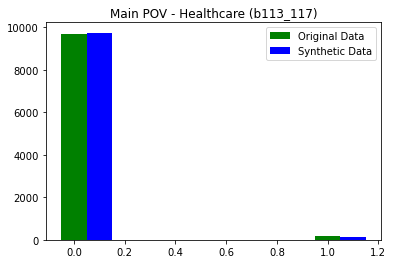

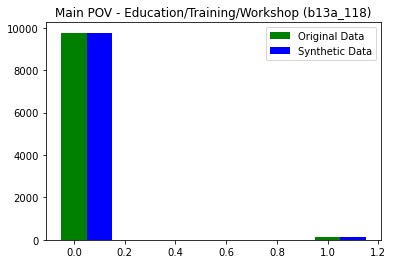

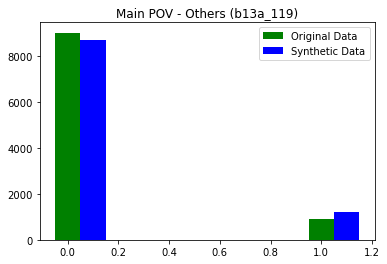

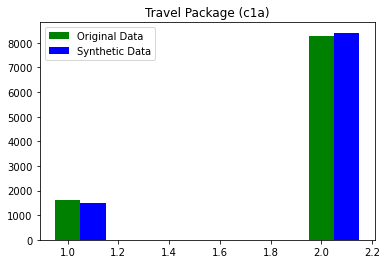

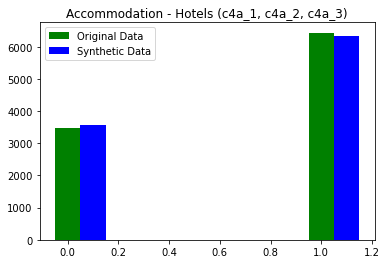

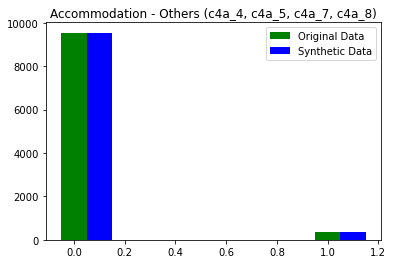

In [22]:
plot_bar(OVS1618_test,ctgan_samples_cleaned,cat_cols)